In [104]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,p,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [105]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [106]:
df.isnull().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [107]:
(df =='unknown').sum().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [108]:
df.replace(['unknown'], np.nan, inplace=True)
df.isnull().sum().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [109]:
for column in df.columns:
    if df[column].isnull().any():
        mode_value = df[column].mode(dropna=True)
        if not mode_value.empty:
            df[column] = df[column].fillna(mode_value.iloc[0])
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,p,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


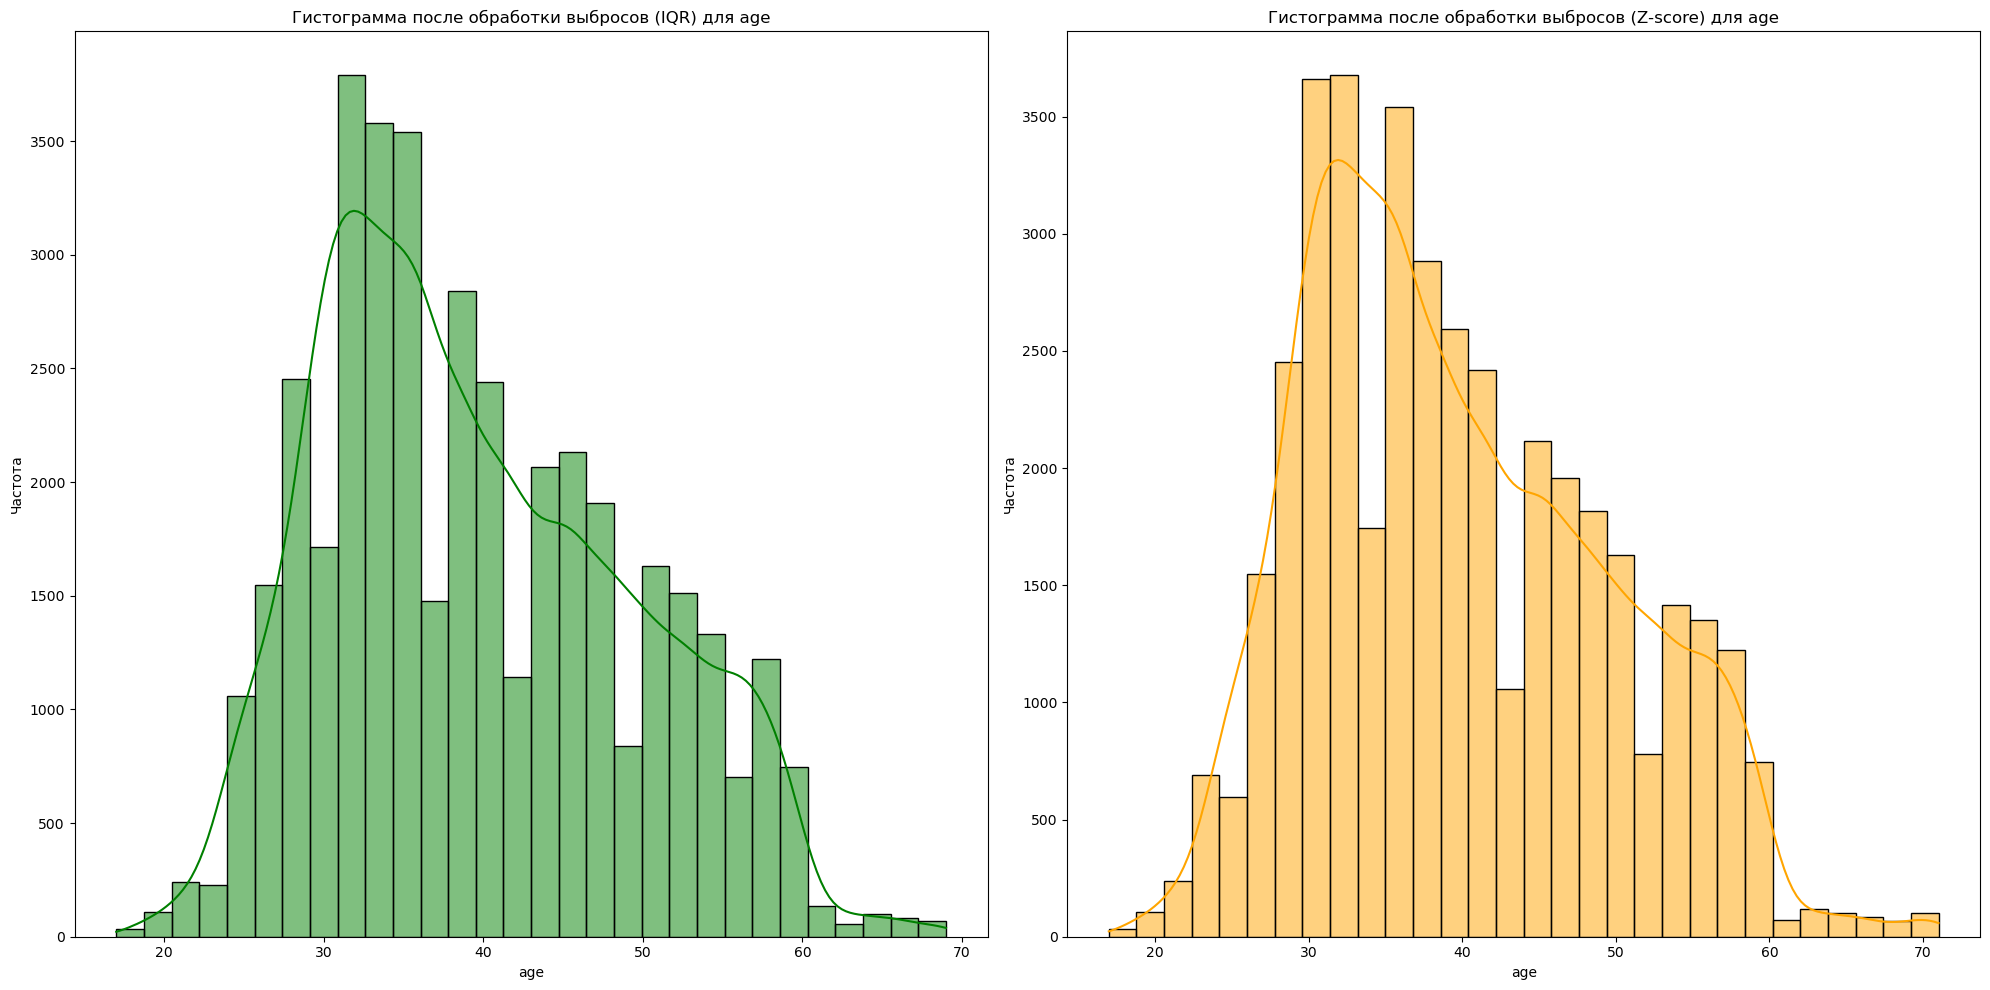

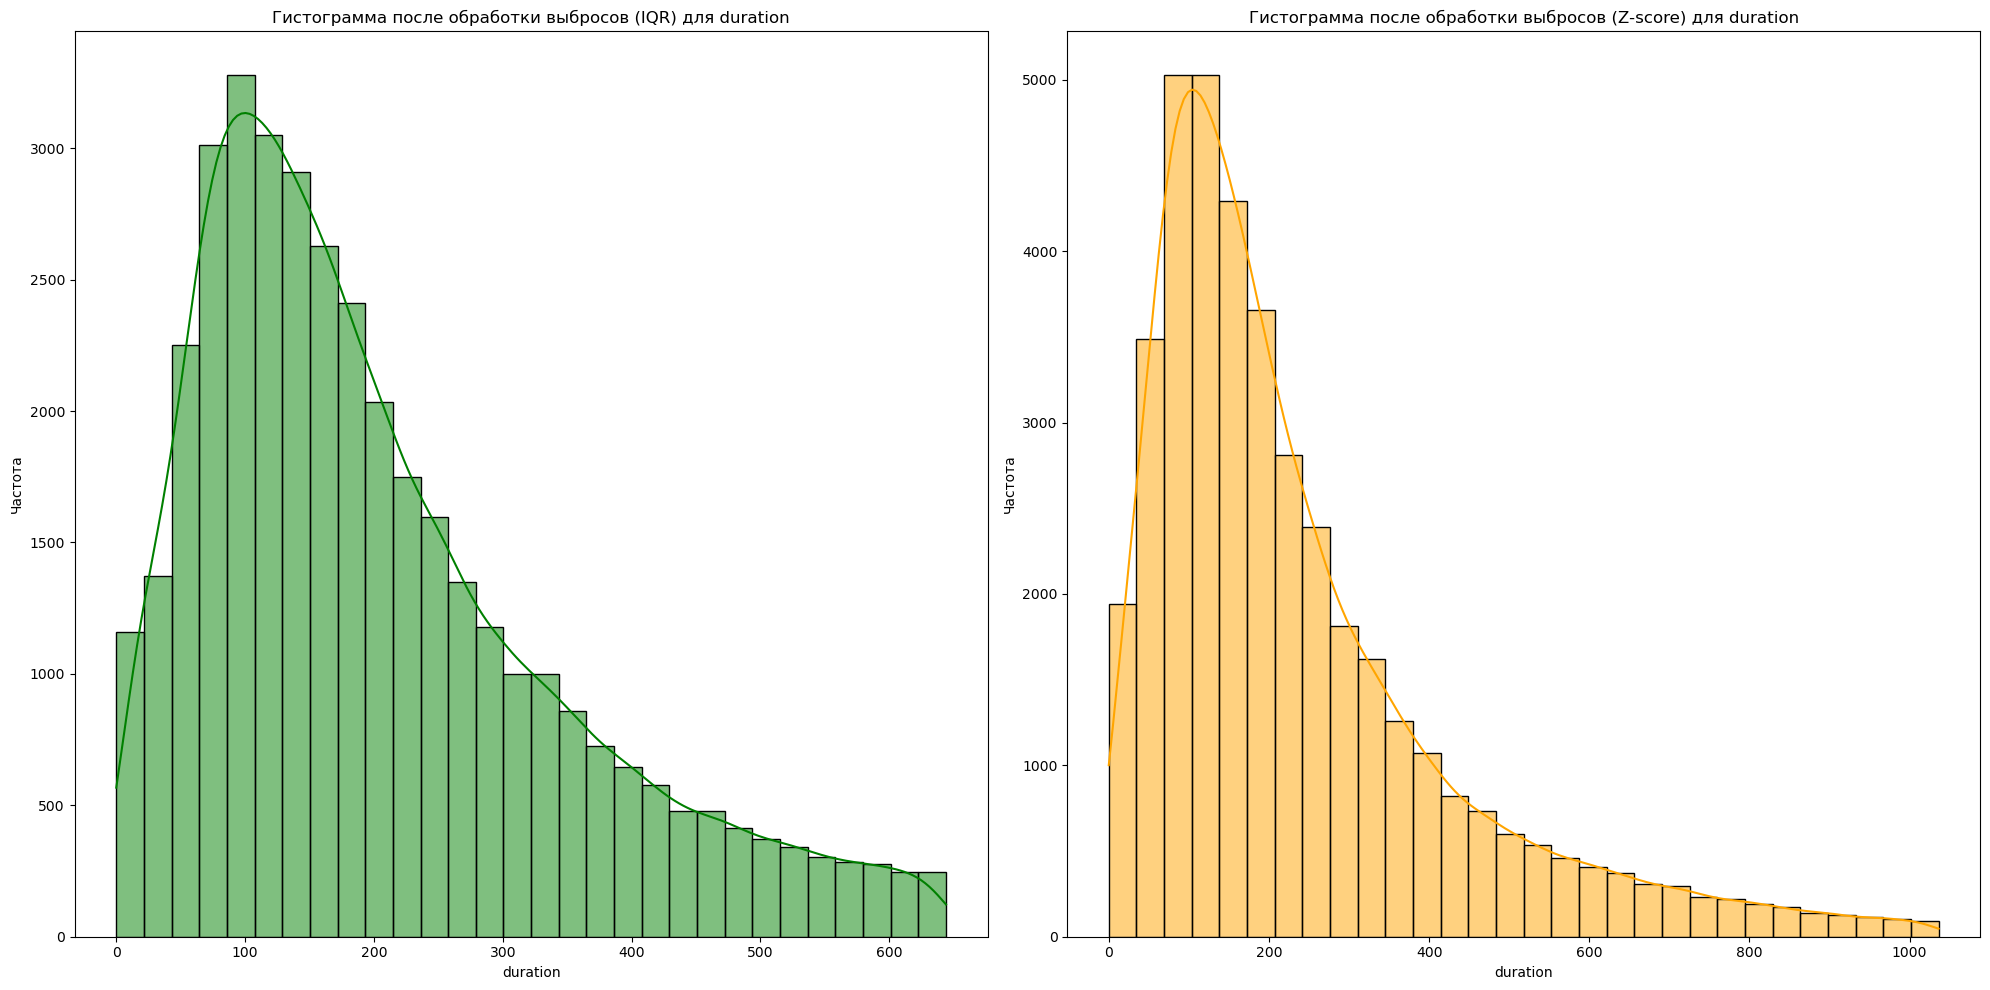

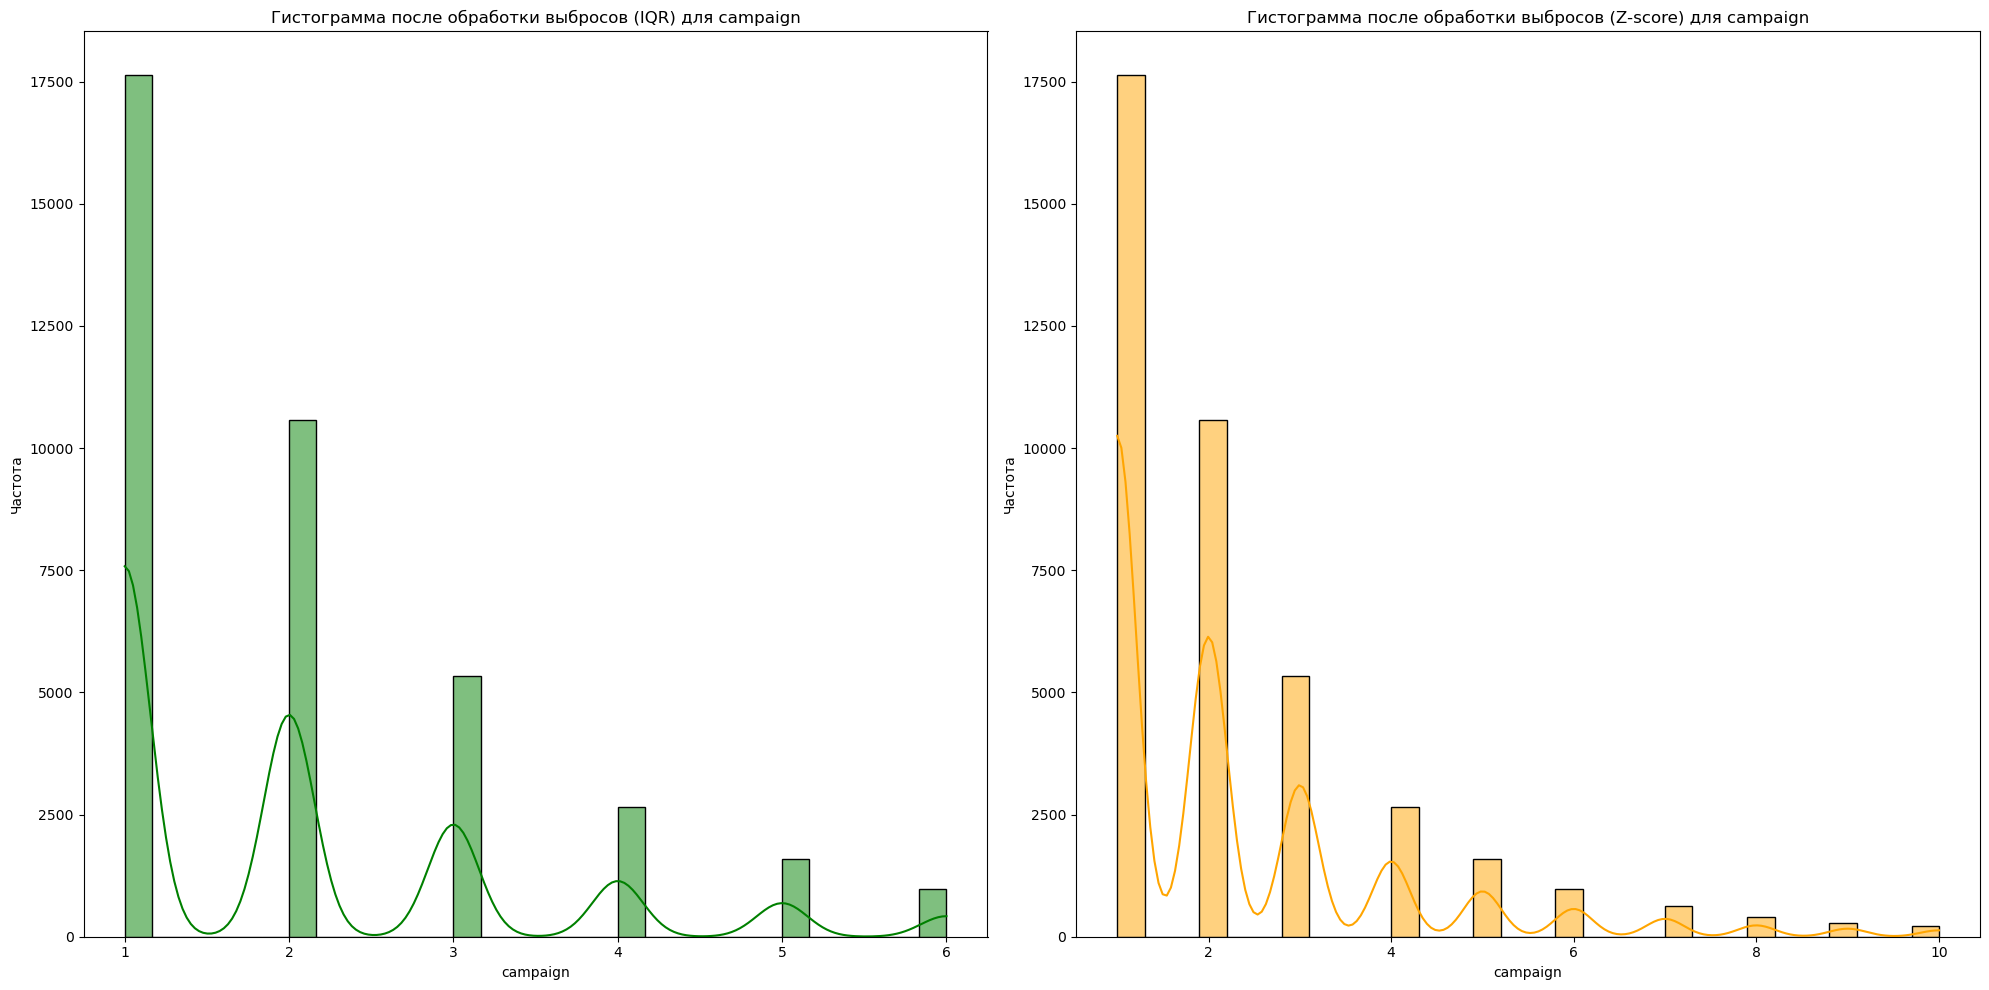

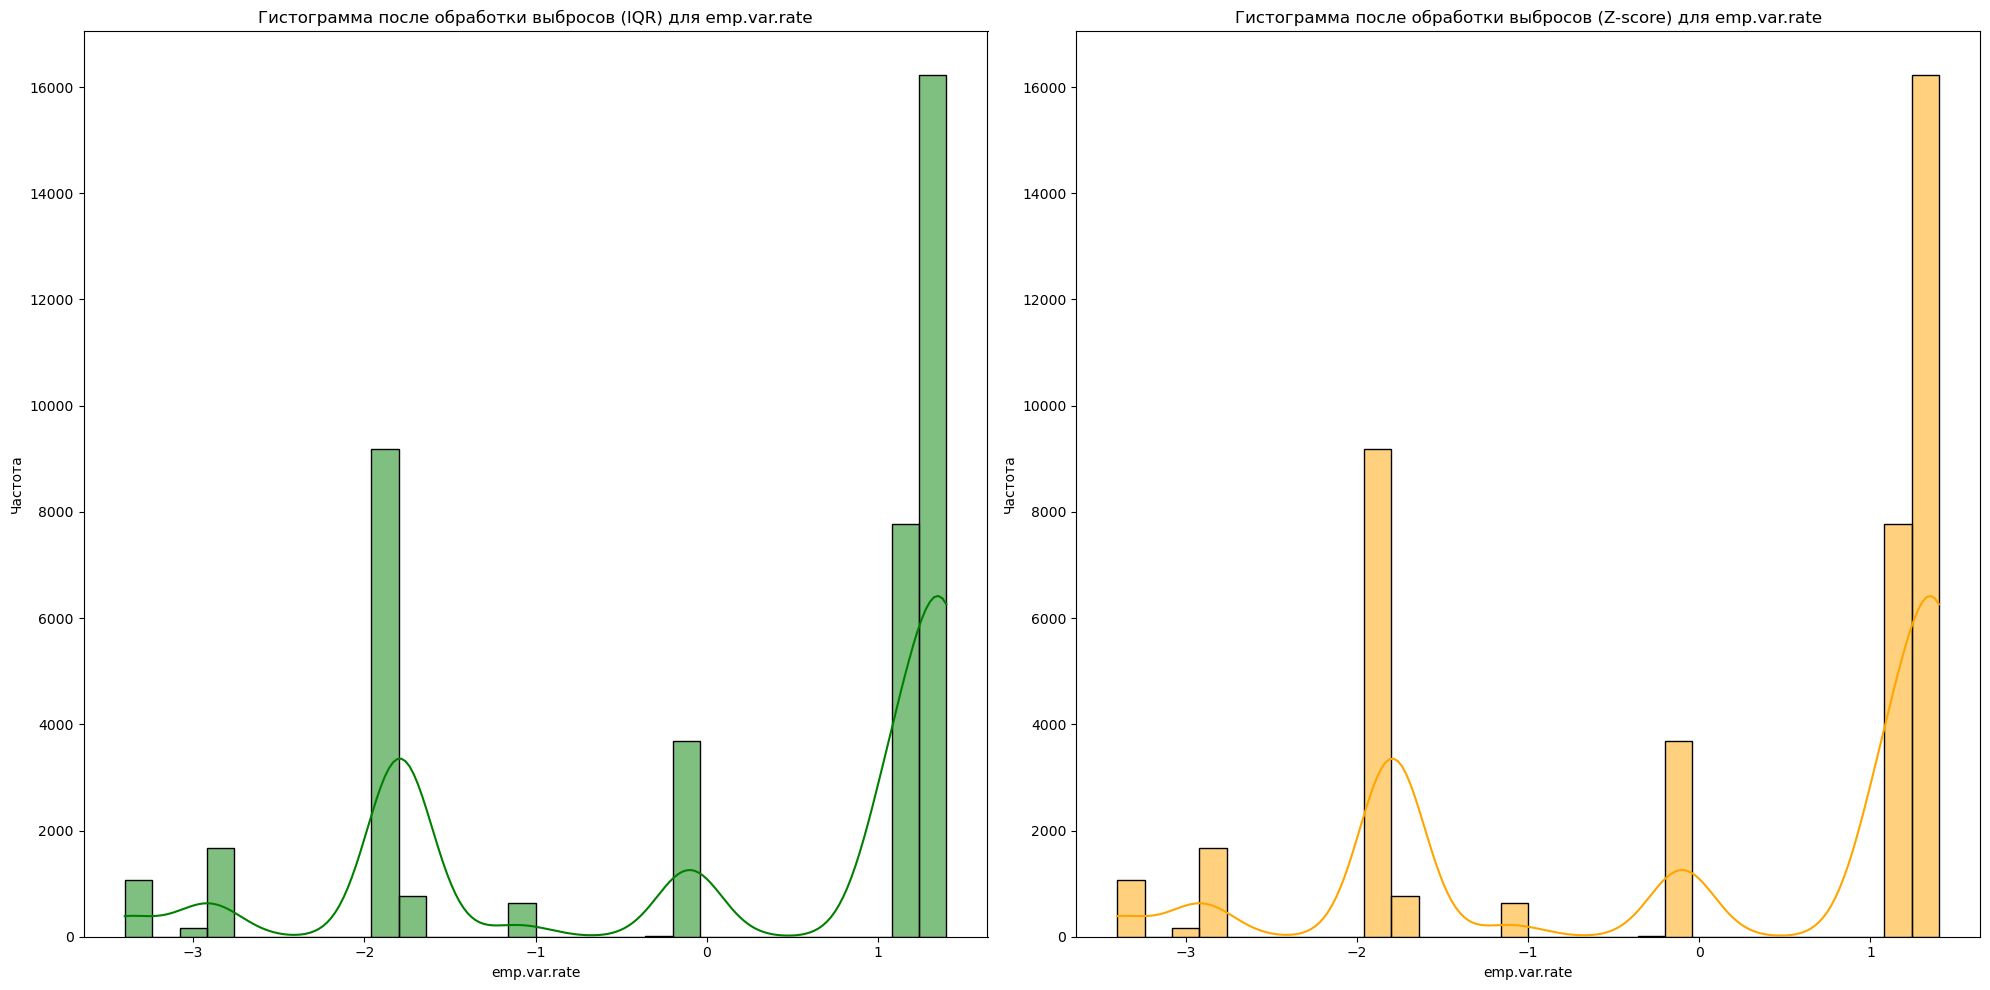

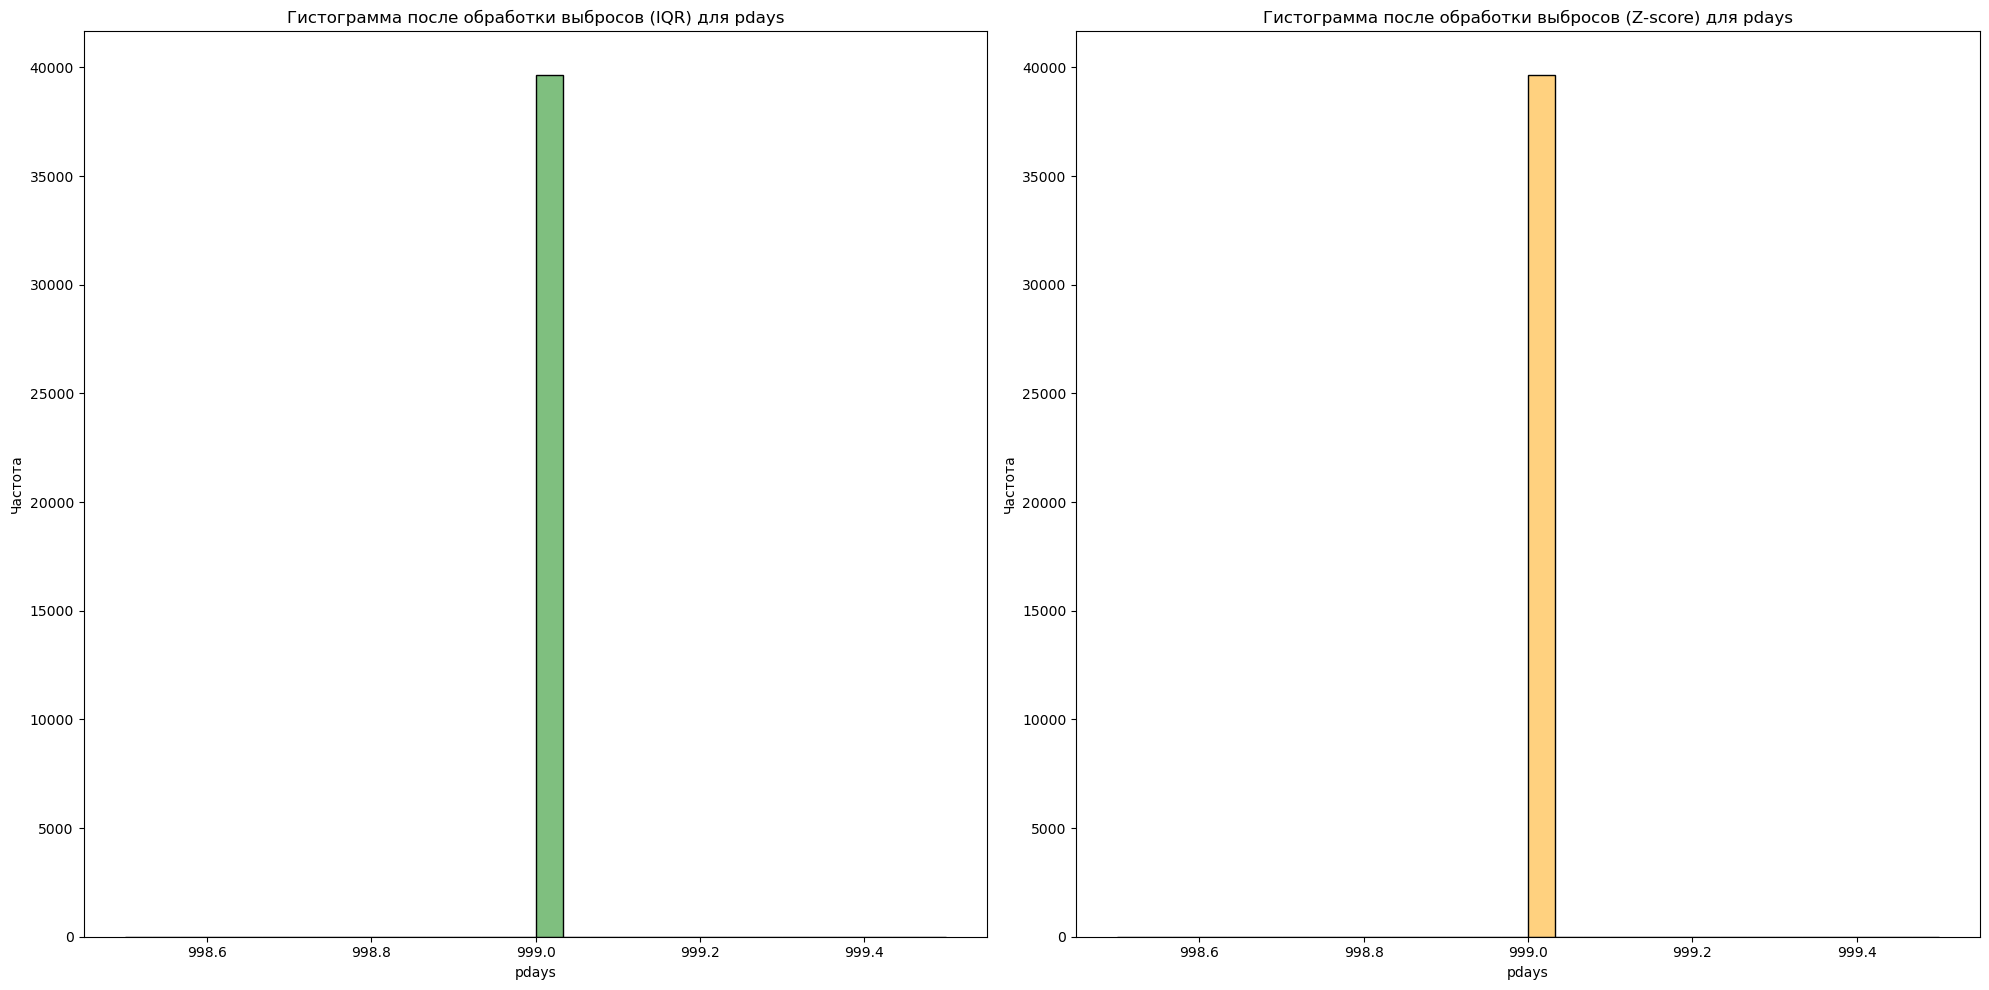

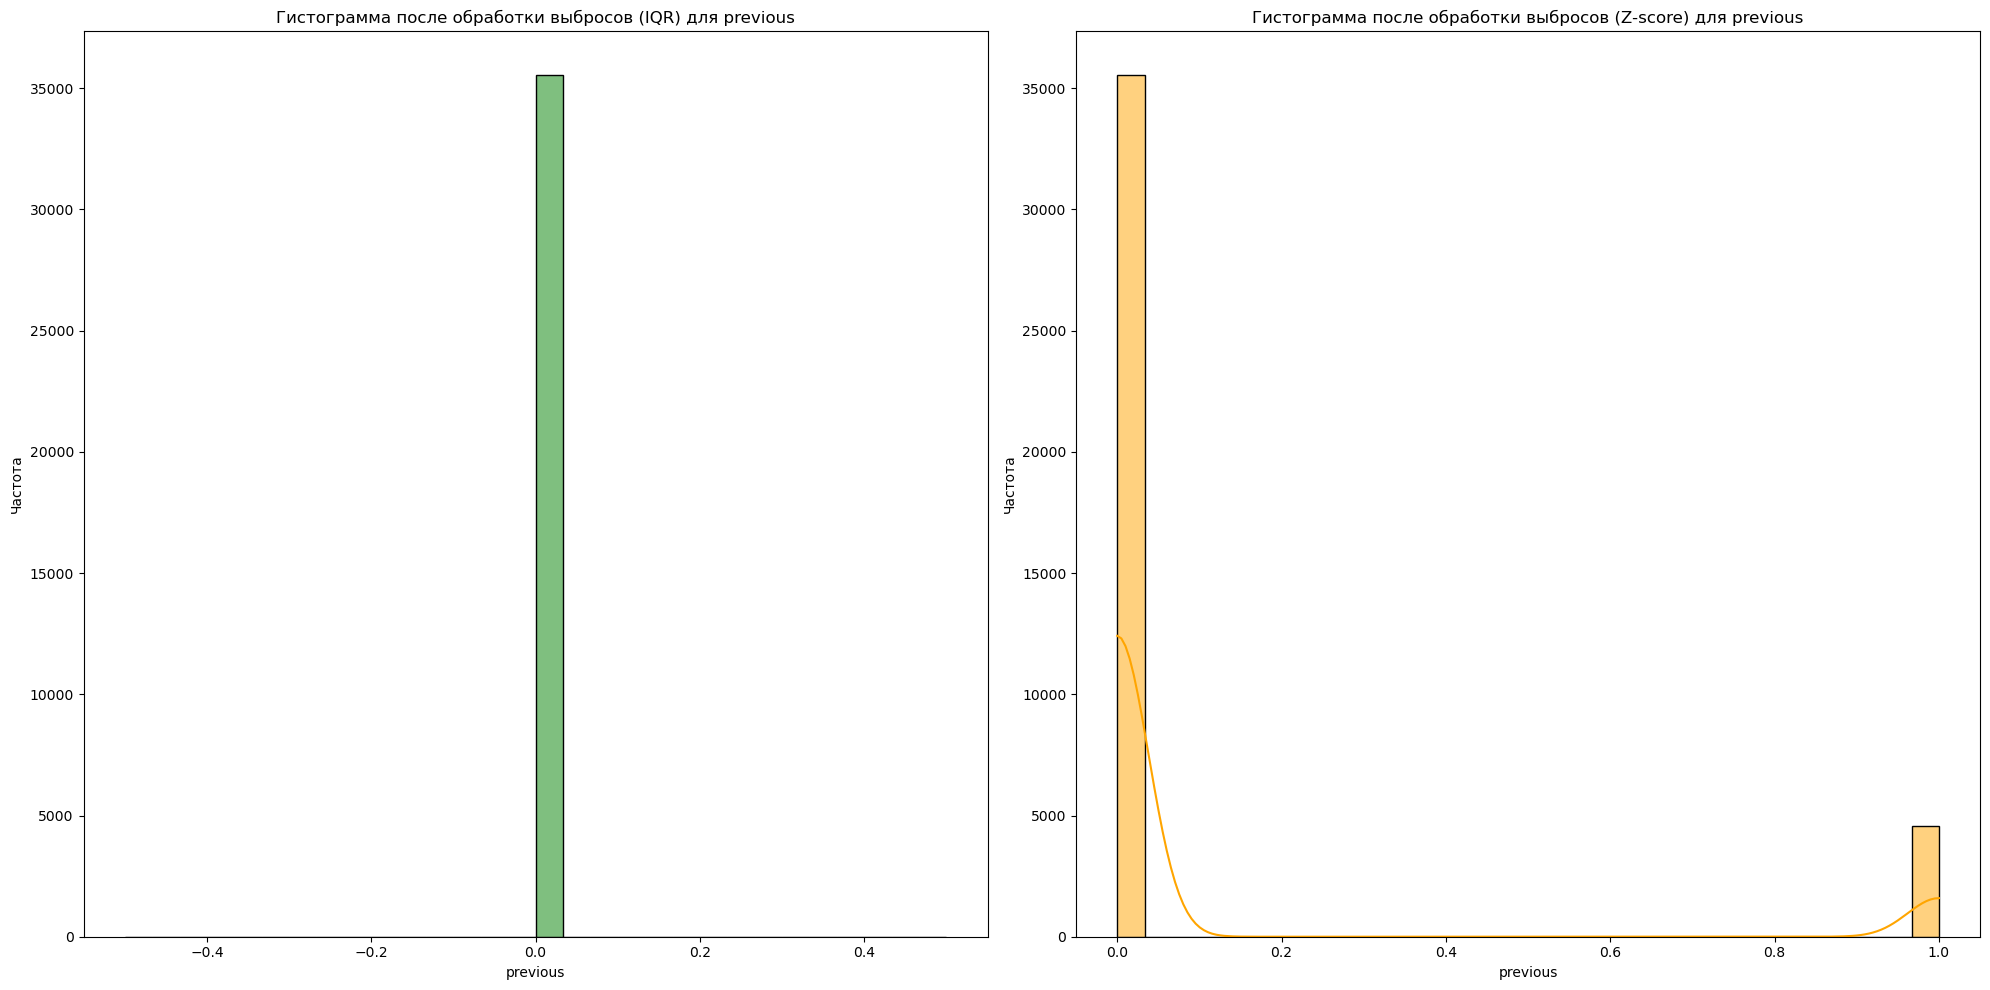

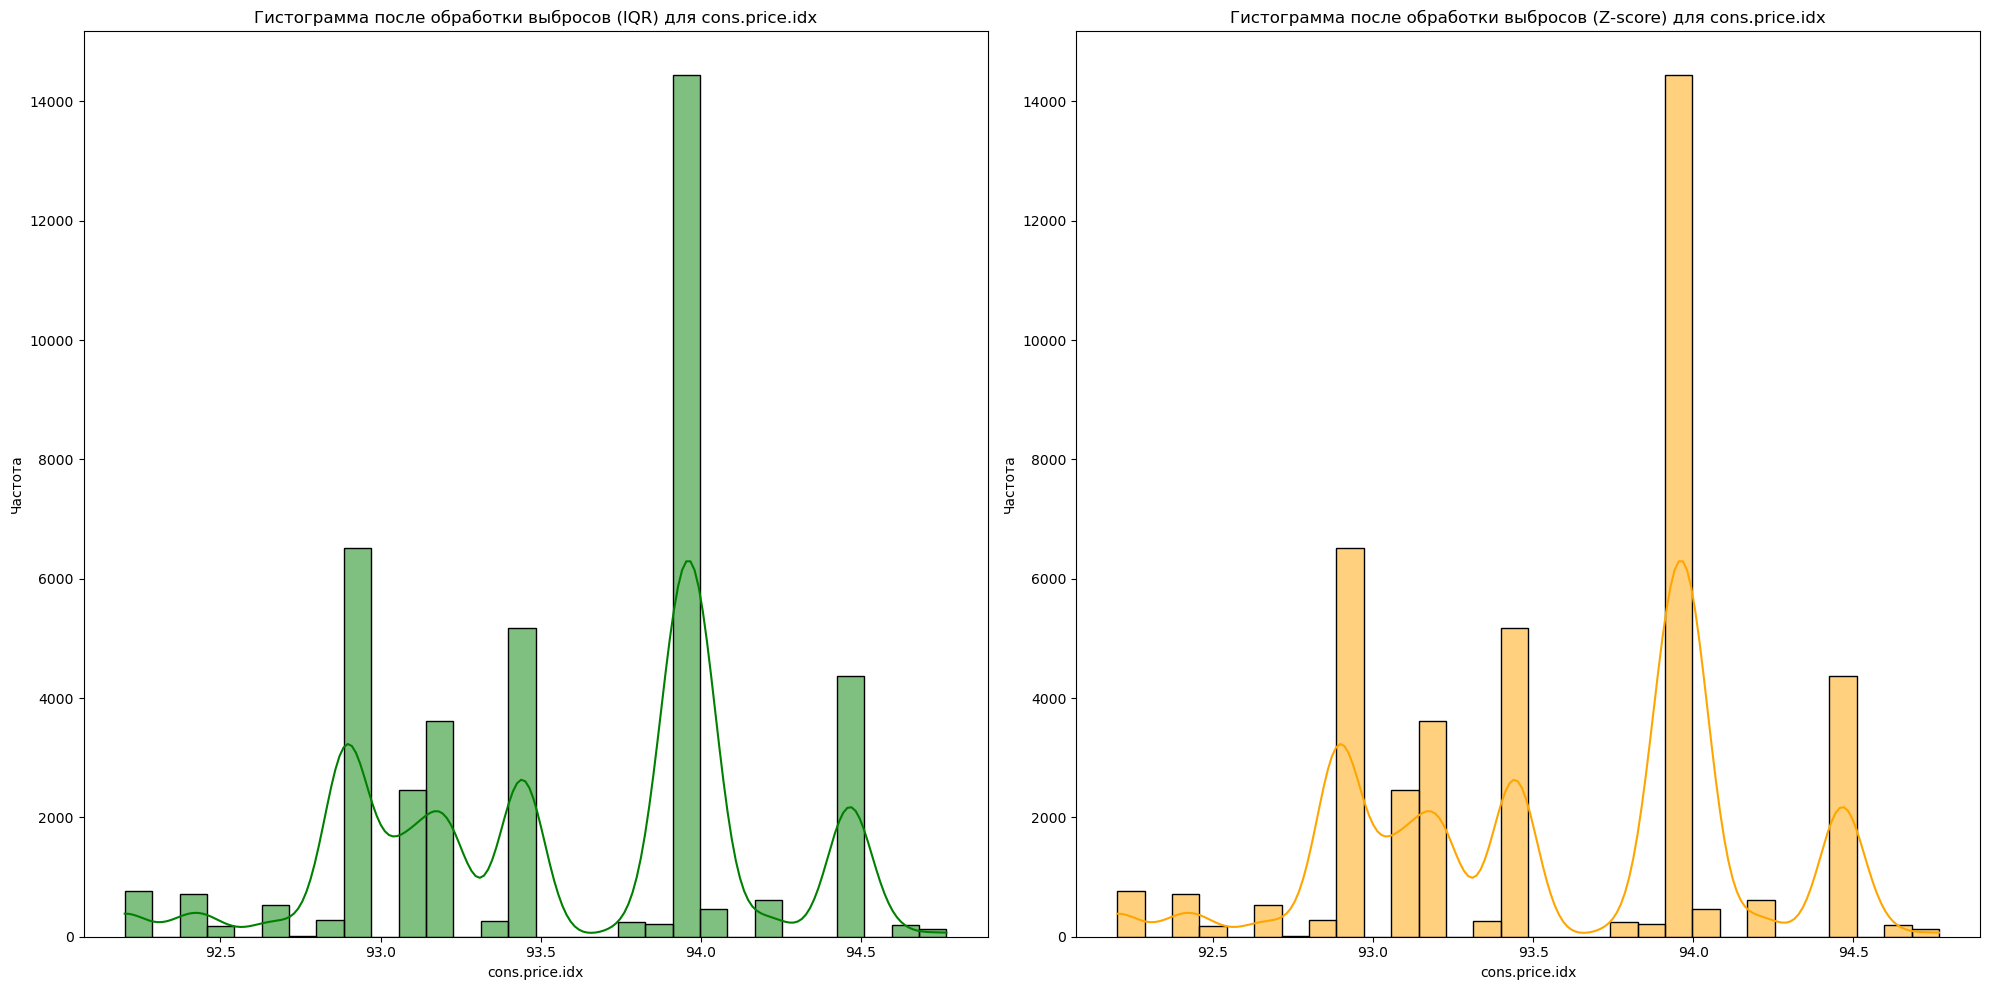

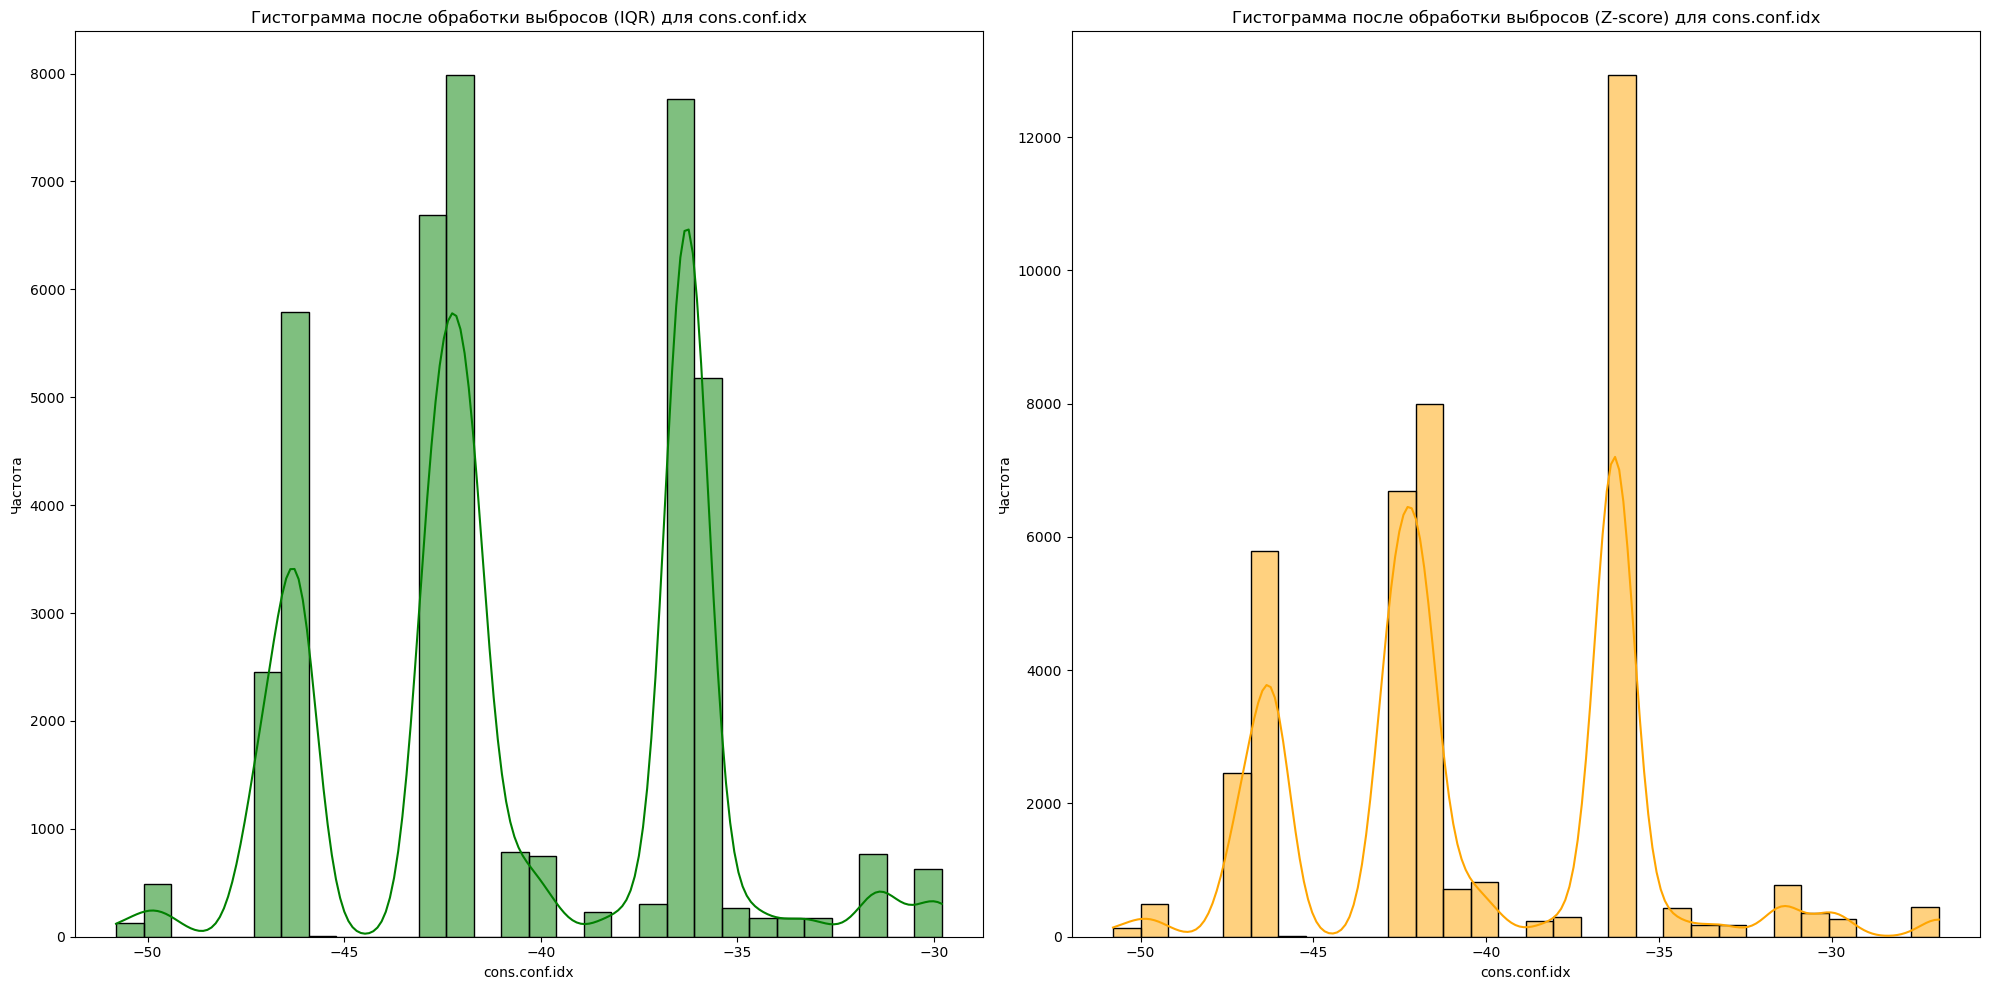

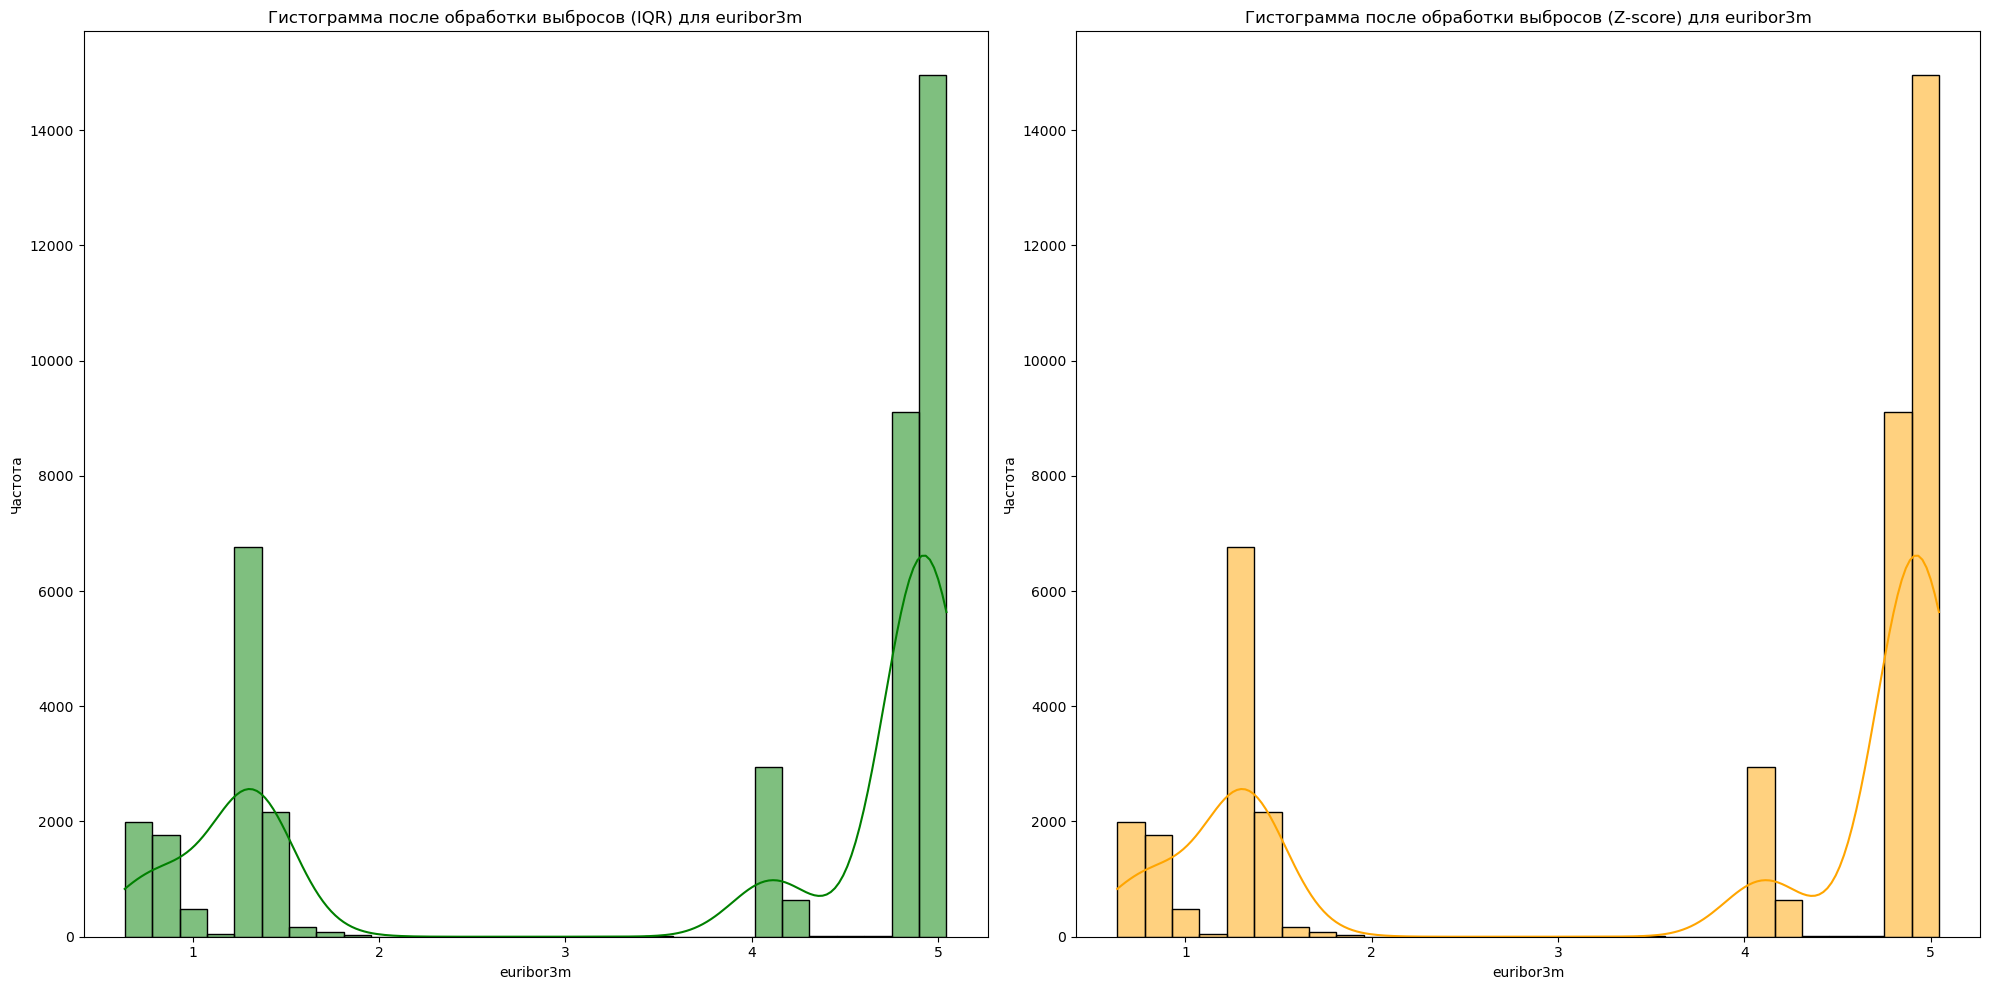

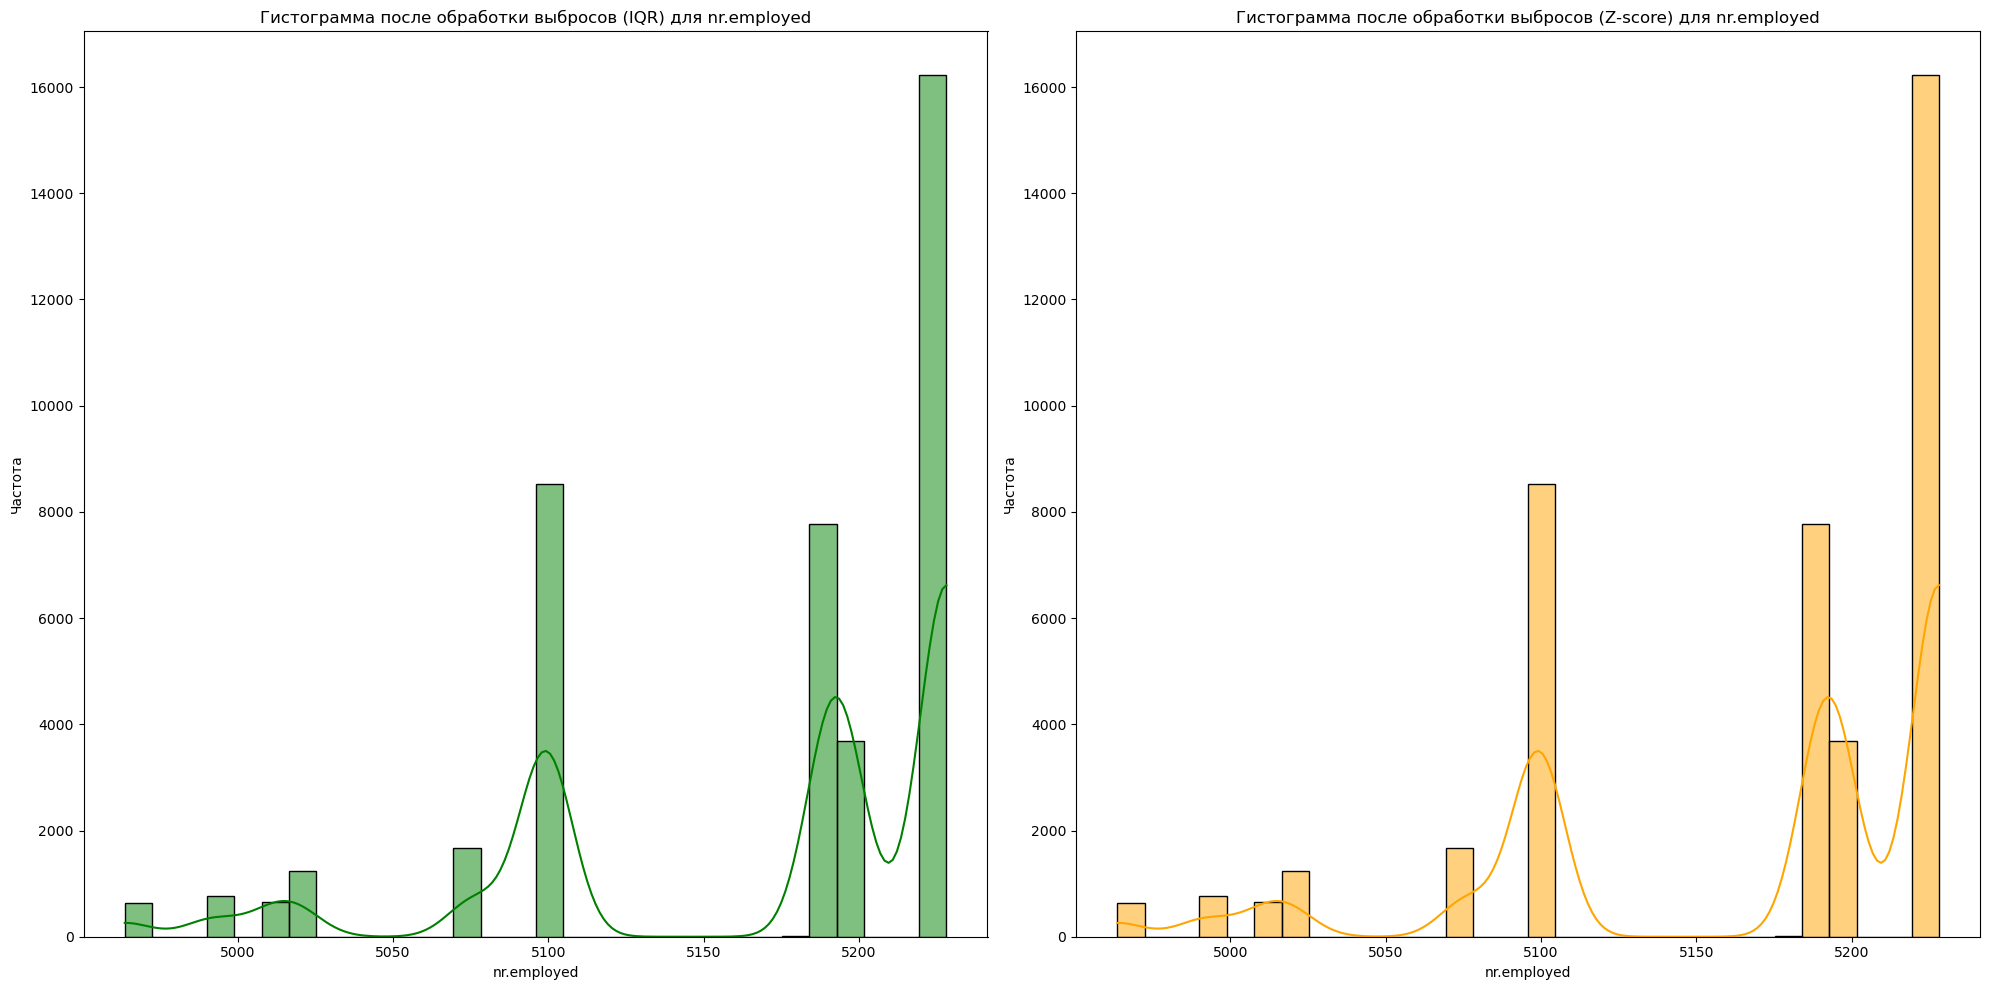

In [110]:
import seaborn as sns

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

def find_outliers_zscore(data, threshold=3):## отправляем маску
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

for column in ['age', 'duration', 'campaign', 'emp.var.rate', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    outliers_iqr = find_outliers_iqr(df[column])
    df_processed = df[~outliers_iqr]  # Удаление выбросов

    outliers_zscore = find_outliers_zscore(df[column])
    df_processed_zscore = df[~outliers_zscore] 

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    sns.histplot(df_processed[column], kde=True, ax=axes[0], color='green', bins=30)
    axes[0].set_title(f'Гистограмма после обработки выбросов (IQR) для {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Частота')

    sns.histplot(df_processed_zscore[column], kde=True, ax=axes[1], color='orange', bins=30)
    axes[1].set_title(f'Гистограмма после обработки выбросов (Z-score) для {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

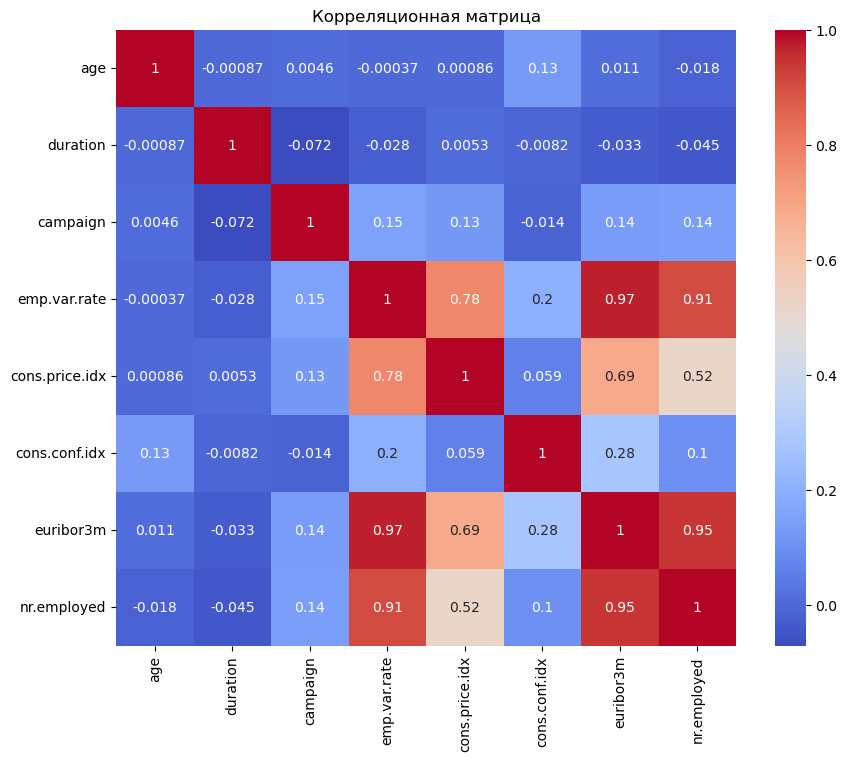

In [111]:
correlation = df[['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [112]:
# Age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Total contact duration per campaign
df['avg_duration_per_contact'] = df['duration'] / df['campaign']

# Season based on month
df['season'] = df['month'].map({
    'mar': 'spring', 'apr': 'spring', 'may': 'spring',
    'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
    'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn',
    'dec': 'winter', 'jan': 'winter', 'feb': 'winter'
})

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,avg_duration_per_contact,season
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,p,1.1,93.994,-36.4,4.857,5191.0,no,Senior,261.0,spring
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,149.0,spring
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle,226.0,spring
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle,151.0,spring
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,307.0,spring


In [113]:
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 
                                             'contact', 'month', 'day_of_week', 
                                             'poutcome', 'age_group', 'season'])
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,poutcome_p,poutcome_success,age_group_Young,age_group_Middle,age_group_Senior,age_group_Elderly,season_autumn,season_spring,season_summer,season_winter
0,56,no,no,no,261,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,True,False,False
1,57,no,no,no,149,1,999,0,1.1,93.994,...,False,False,False,False,True,False,False,True,False,False
2,37,no,yes,no,226,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,True,False,False
3,40,no,no,no,151,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,True,False,False
4,56,no,no,yes,307,1,999,0,1.1,93.994,...,False,False,False,False,True,False,False,True,False,False


In [114]:
boolean_like_columns = df_encoded.select_dtypes(include=['bool']).columns
for column in boolean_like_columns:
    df_encoded[column] = df_encoded[column].map({True: 1, False: 0})
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,poutcome_p,poutcome_success,age_group_Young,age_group_Middle,age_group_Senior,age_group_Elderly,season_autumn,season_spring,season_summer,season_winter
0,56,no,no,no,261,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,1,0,0
1,57,no,no,no,149,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,1,0,0
2,37,no,yes,no,226,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
3,40,no,no,no,151,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
4,56,no,no,yes,307,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,1,0,0


In [115]:
binary_features = ['default', 'housing', 'loan', 'y']
for feature in binary_features:
    df_encoded[feature] = df[feature].map({'yes': 1, 'no': 0})

df_encoded.head()


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,poutcome_p,poutcome_success,age_group_Young,age_group_Middle,age_group_Senior,age_group_Elderly,season_autumn,season_spring,season_summer,season_winter
0,56,0,0,0,261,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,1,0,0
1,57,0,0,0,149,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,1,0,0
2,37,0,1,0,226,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
3,40,0,0,0,151,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
4,56,0,0,1,307,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,1,0,0


In [116]:
print(df_encoded.isnull().sum().sum())

print(df_encoded.dtypes)


0
age                  int64
default              int64
housing              int64
loan                 int64
duration             int64
                     ...  
age_group_Elderly    int64
season_autumn        int64
season_spring        int64
season_summer        int64
season_winter        int64
Length: 65, dtype: object


In [117]:
correlation_with_y = df_encoded.corr()['y'].sort_values(ascending=False)

print(correlation_with_y.head(10))  
print(correlation_with_y.tail(10))  

y                           1.000000
duration                    0.405274
avg_duration_per_contact    0.351530
poutcome_success            0.316269
previous                    0.230181
age_group_Elderly           0.162728
contact_cellular            0.144773
month_mar                   0.144014
month_oct                   0.137366
month_sep                   0.126067
Name: y, dtype: float64
campaign               -0.066357
job_blue-collar        -0.074423
month_may              -0.108271
cons.price.idx         -0.136211
contact_telephone      -0.144773
poutcome_nonexistent   -0.193467
emp.var.rate           -0.298334
euribor3m              -0.307771
pdays                  -0.324914
nr.employed            -0.354678
Name: y, dtype: float64


In [118]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)  
y = df_encoded['y'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Missing values:
age              0
default          0
housing          0
loan             0
duration         0
                ..
season_autumn    0
season_spring    0
season_summer    0
season_winter    0
target           0
Length: 65, dtype: int64
Accuracy: 0.9159


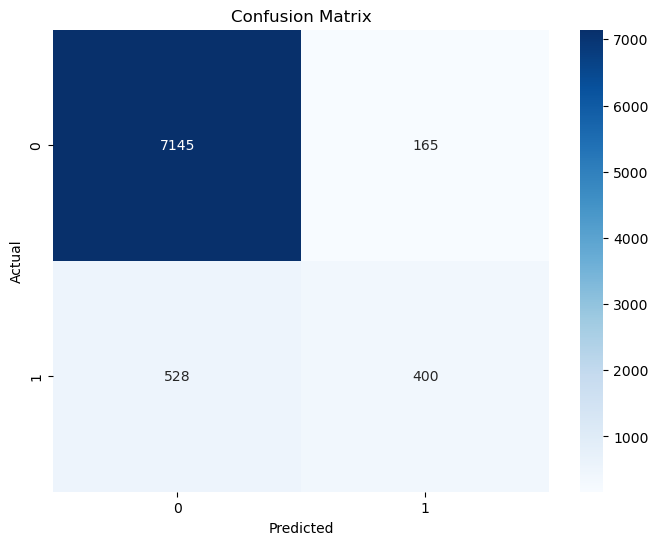


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.70      0.74      8238
weighted avg       0.91      0.92      0.91      8238


Cross-validation scores: [0.90986343 0.91153263 0.90379363 0.91213961 0.9107739 ]
Mean CV score: 0.9096


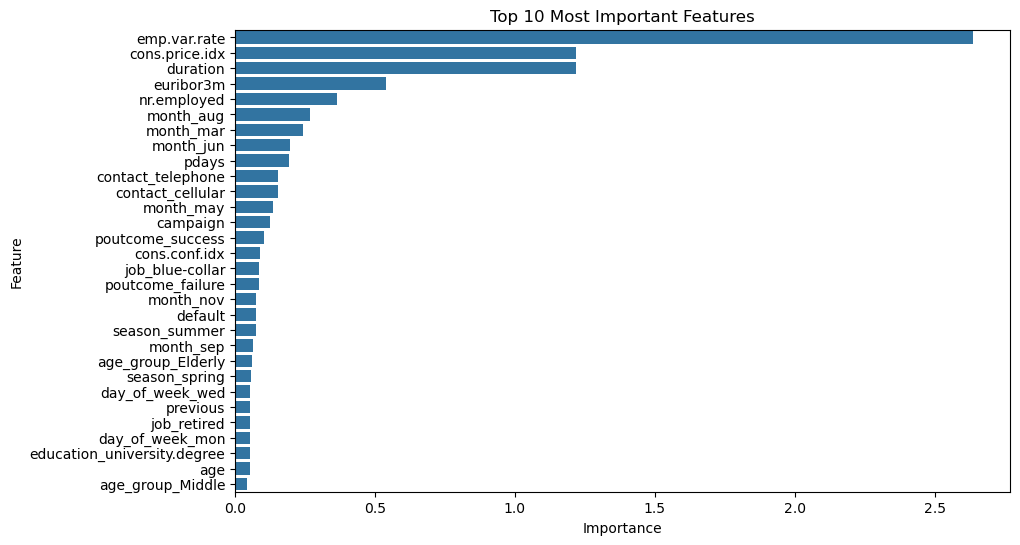

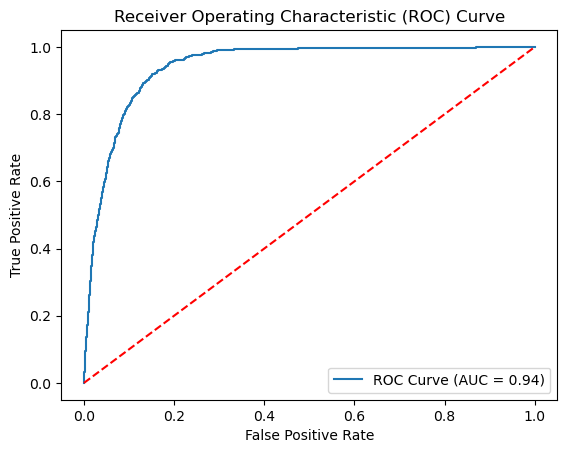

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Create a DataFrame for easier data manipulation
df = pd.DataFrame(X, columns=X.columns)
df['target'] = y

# Data preprocessing
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Extract probabilities for the positive class
auc_roc = roc_auc_score(y_test, probabilities)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Decision Tree Accuracy: 0.8911


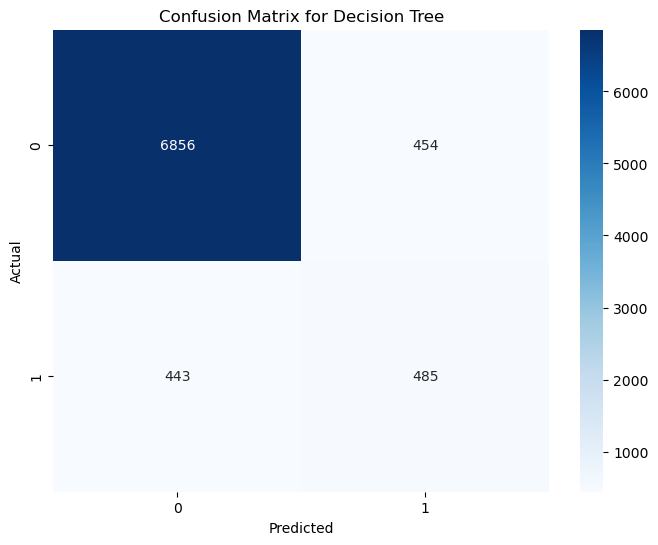


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.52      0.52      0.52       928

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



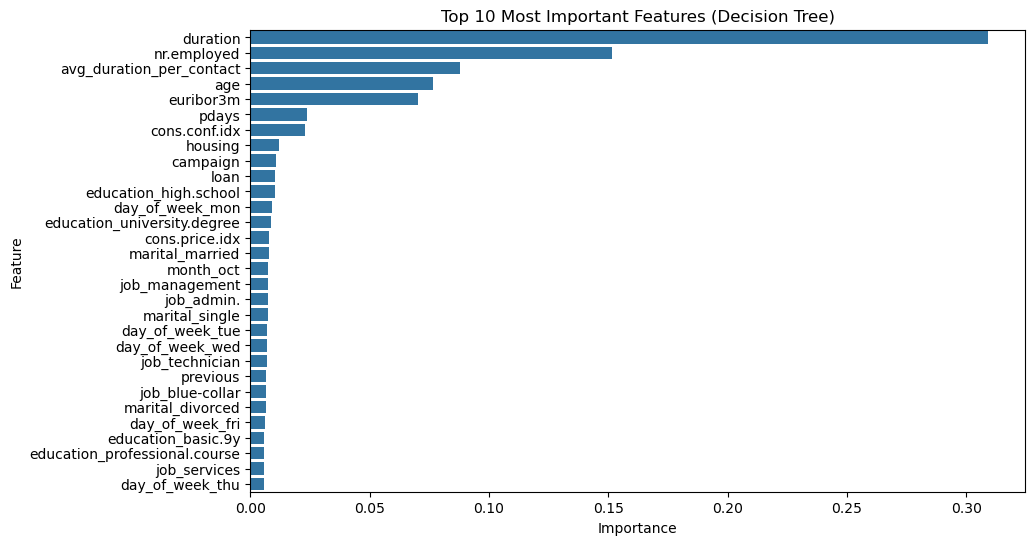

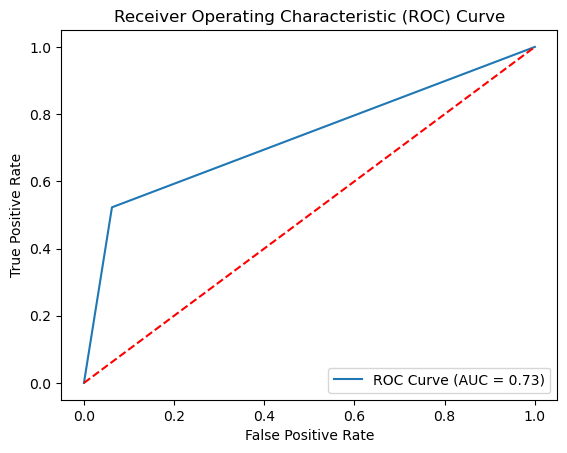

In [120]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Fit the model on the training data

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)
probabilities = dt_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Display confusion matrix for decision tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report for decision tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Feature importance for decision tree
feature_importance_dt = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_dt.head(30))
plt.title('Top 10 Most Important Features (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Random Forest Accuracy: 0.9212


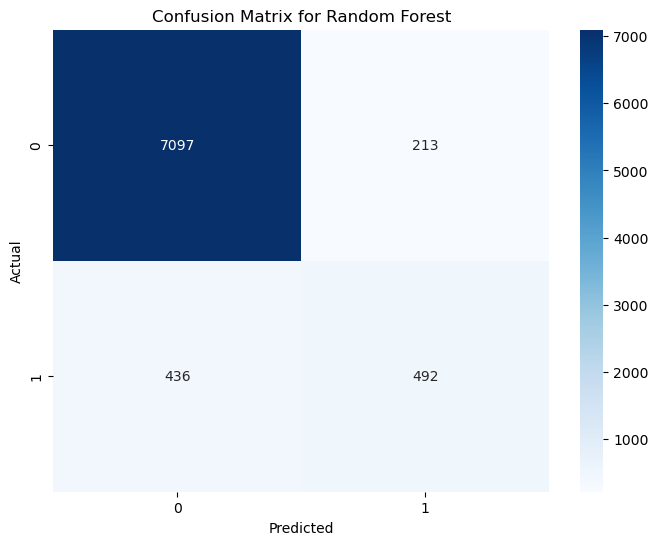


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.70      0.53      0.60       928

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238



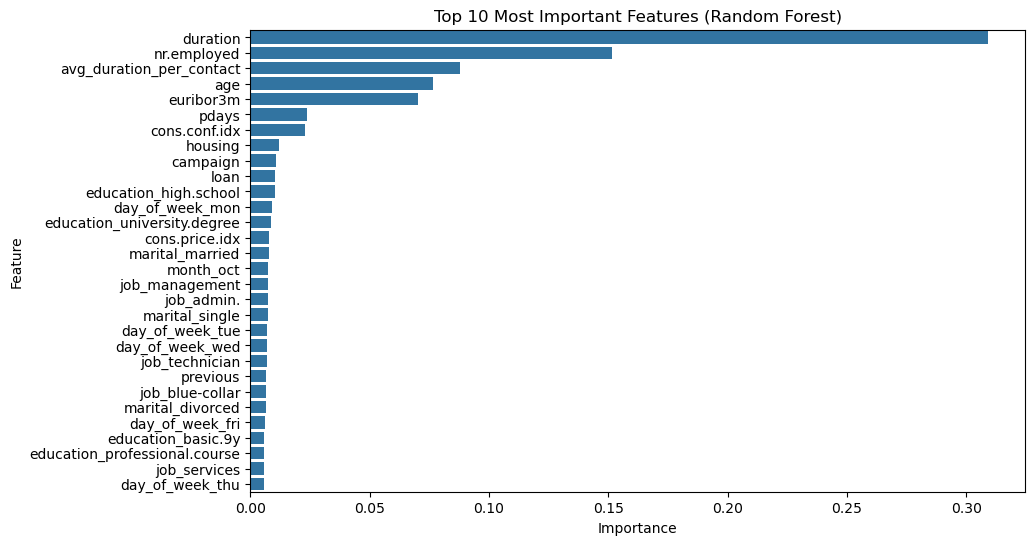

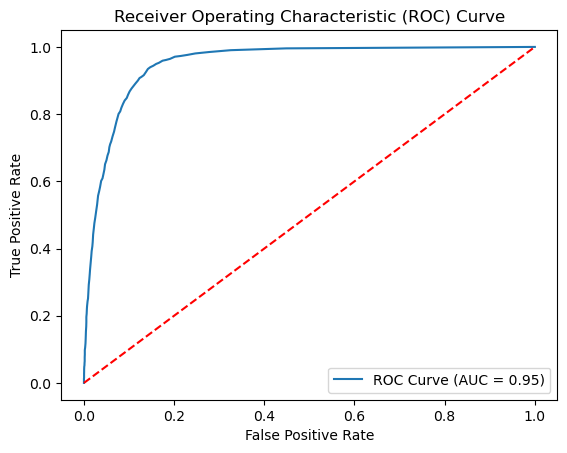

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Train the decision tree model
dt_model = RandomForestClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Fit the model on the training data

# Make predictions on the test set
y_pred_rf = dt_model.predict(X_test)
probabilities = dt_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

feature_importance_rf = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance_rf = feature_importance_dt.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf.head(30))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Gradient Boosting Accuracy: 0.9224


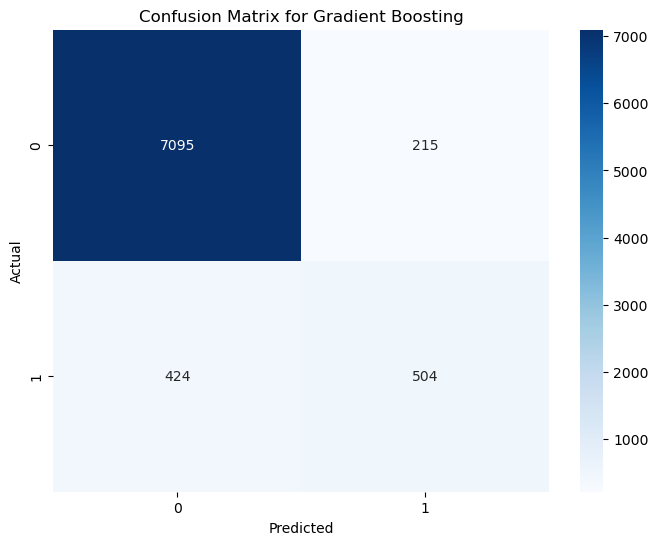


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.70      0.54      0.61       928

    accuracy                           0.92      8238
   macro avg       0.82      0.76      0.78      8238
weighted avg       0.92      0.92      0.92      8238



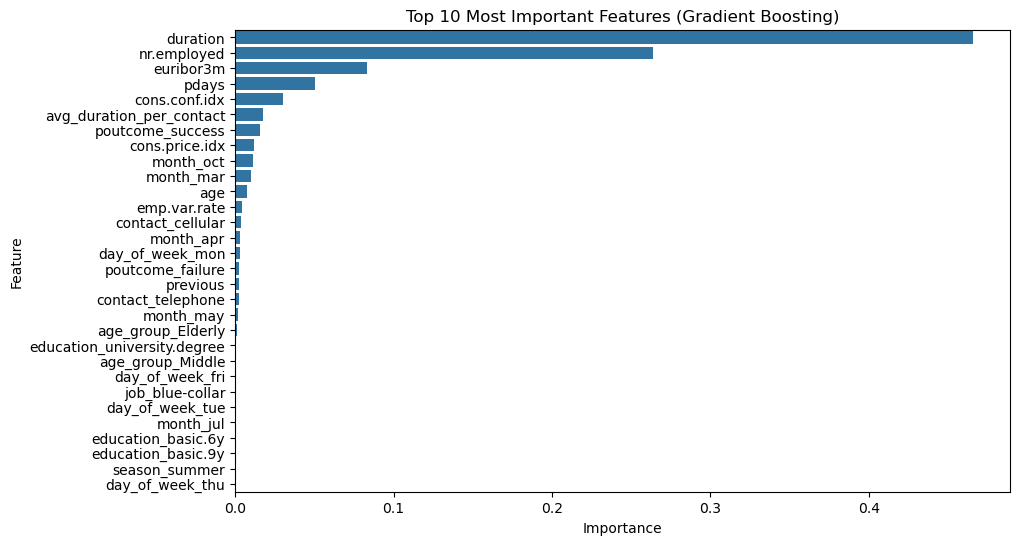

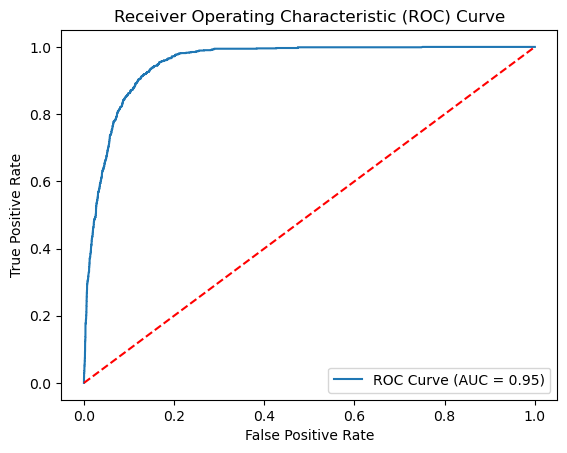

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

dt_model = GradientBoostingClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Fit the model on the training data

# Make predictions on the test set
y_pred_gb = dt_model.predict(X_test)
probabilities = dt_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

feature_importance_gb = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance_gb = feature_importance_gb.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_gb.head(30))
plt.title('Top 10 Most Important Features (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

SVM Accuracy: 0.9149


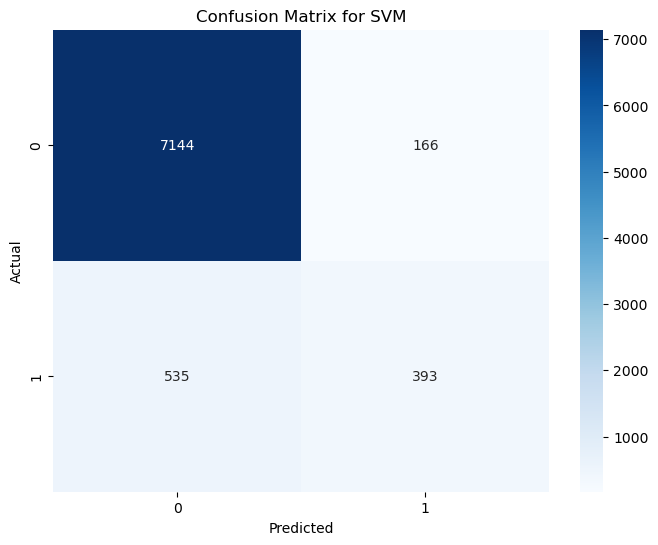


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.42      0.53       928

    accuracy                           0.91      8238
   macro avg       0.82      0.70      0.74      8238
weighted avg       0.90      0.91      0.91      8238



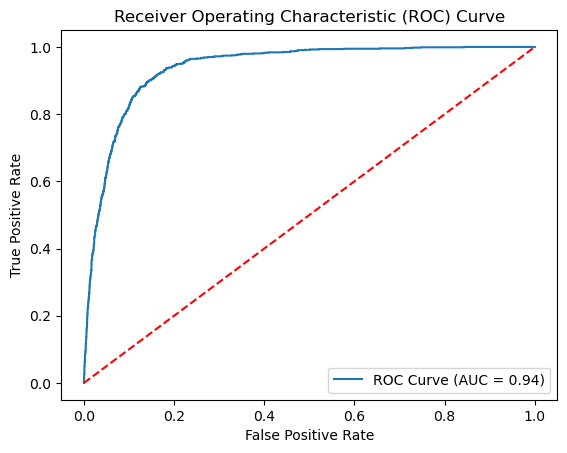

In [125]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = svm.SVC(kernel='rbf', C=1.0, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")